## Background
You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

### Submission File

For each ID in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

ID,TARGET
2,0
5,0
6,0
etc.

## Initialise

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.container {
    width: 100%;
}
</style>
""")

In [2]:
import graphlab as gl
gl.canvas.set_target('ipynb')
import tools 
import initialise

IndentationError: unindent does not match any outer indentation level (tools.py, line 124)

In [ ]:
train_data, test_data = initialise.load_data(reload_data=False)

# Basic data preparation

In [4]:
train_data     = gl.SFrame.read_csv('Data/train.csv', verbose=False)
test_data      = gl.SFrame.read_csv('Data/test.csv', verbose=False)

## Translate into English
Perform a very rough translation of the column names into English

Add the following raw spanish column names to this [google spreedsheet](https://docs.google.com/spreadsheets/d/1F84P6zz5OZHTqpACL2Hb17lDtWm1a6cJxzVBa8sfJmg/edit?usp=sharing)

In [108]:
for col in train_data.column_names():
    print col

ID
var3
var15
imp_ent_var16_ult1
imp_op_var39_comer_ult1
imp_op_var39_comer_ult3
imp_op_var40_comer_ult1
imp_op_var40_comer_ult3
imp_op_var40_efect_ult1
imp_op_var40_efect_ult3
imp_op_var40_ult1
imp_op_var41_comer_ult1
imp_op_var41_comer_ult3
imp_op_var41_efect_ult1
imp_op_var41_efect_ult3
imp_op_var41_ult1
imp_op_var39_efect_ult1
imp_op_var39_efect_ult3
imp_op_var39_ult1
imp_sal_var16_ult1
ind_var1_0
ind_var1
ind_var2_0
ind_var2
ind_var5_0
ind_var5
ind_var6_0
ind_var6
ind_var8_0
ind_var8
ind_var12_0
ind_var12
ind_var13_0
ind_var13_corto_0
ind_var13_corto
ind_var13_largo_0
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var13
ind_var14_0
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var24_0
ind_var24
ind_var25_cte
ind_var26_0
ind_var26_cte
ind_var26
ind_var25_0
ind_var25
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var30
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33


Expand the spanish shorthand

In [65]:
abbreviations = {
                    'num_': 'numero_',
                    'ent': 'entidad',
                    'imp': 'importe', 
                    'op': 'opcion',
                    'comer': 'comercial',
                    'amort': 'amortizacion',
                    'aport': 'aportacion',
                    'reemb': 'reembolso',
                    'trasp': 'traspaso',
                    'num_op': 'numero_de_transacciones',
                    'efect':'efectivo',
                    'ind': 'indicador',
                    'emit': 'emitido',
                    'recib': 'recibido',
                    'med_': 'medio_',
                    'ult': 'ultima',
                }
def expand(s):

    expanded = str(s)
    for k,v in abbreviations.iteritems():
        expanded = expanded.replace(k, v)

    return expanded

for col in train_data.column_names():
    print expand(col).replace('_', ' ')

ID
var3
var15
importe entidad var16 ultima1
importe opcion var39 comercial ultima1
importe opcion var39 comercial ultima3
importe opcion var40 comercial ultima1
importe opcion var40 comercial ultima3
importe opcion var40 efectivo ultima1
importe opcion var40 efectivo ultima3
importe opcion var40 ultima1
importe opcion var41 comercial ultima1
importe opcion var41 comercial ultima3
importe opcion var41 efectivo ultima1
importe opcion var41 efectivo ultima3
importe opcion var41 ultima1
importe opcion var39 efectivo ultima1
importe opcion var39 efectivo ultima3
importe opcion var39 ultima1
importe sal var16 ultima1
indicador var1 0
indicador var1
indicador var2 0
indicador var2
indicador var5 0
indicador var5
indicador var6 0
indicador var6
indicador var8 0
indicador var8
indicador var12 0
indicador var12
indicador var13 0
indicador var13 corto 0
indicador var13 corto
indicador var13 largo 0
indicador var13 largo
indicador var13 medio 0
indicador var13 medio
indicador var13
indicador var14

Paste the list above into google translate and the results in this [google spreedsheet](https://docs.google.com/spreadsheets/d/1F84P6zz5OZHTqpACL2Hb17lDtWm1a6cJxzVBa8sfJmg/edit?usp=sharing)

In [114]:
import csv
with open('Data/Spanish2English.csv', 'rb') as f:
    reader = csv.reader(f)
    headers = reader.next()
    spanish2english = dict(reader)

print len(spanish2english)
#spanish2english

366


{'delta_imp_amort_var18_1y3': 'var18 amortization amount delta 1Y3',
 'delta_imp_amort_var34_1y3': 'var34 amortization amount delta 1Y3',
 'delta_imp_aport_var13_1y3': 'var13 amortization amount delta 1Y3',
 'delta_imp_aport_var17_1y3': 'var17 amortization amount delta 1Y3',
 'delta_imp_aport_var33_1y3': 'var33 amortization amount delta 1Y3',
 'delta_imp_compra_var44_1y3': 'var44 amortization amount delta 1Y3',
 'delta_imp_reemb_var13_1y3': 'var13 refund amount delta 1Y3',
 'delta_imp_reemb_var17_1y3': 'var17 refund amount delta 1Y3',
 'delta_imp_reemb_var33_1y3': 'var33 refund amount delta 1Y3',
 'delta_imp_trasp_var17_in_1y3': 'var17 delta transfer amount in 1Y3',
 'delta_imp_trasp_var17_out_1y3': 'var17 delta transfer amount out 1Y3',
 'delta_imp_trasp_var33_in_1y3': 'var33 delta transfer amount in 1Y3',
 'delta_imp_trasp_var33_out_1y3': 'var33 delta transfer amount out 1Y3',
 'delta_imp_venta_var44_1y3': 'ventidada delta amount var44 1Y3',
 'delta_num_aport_var13_1y3': 'var13 delta

The [google spreedsheet](https://docs.google.com/spreadsheets/d/1F84P6zz5OZHTqpACL2Hb17lDtWm1a6cJxzVBa8sfJmg/edit?usp=sharing) is manually edited, and uploaded as a CSV file

In [118]:
train_data.rename(spanish2english)
test_data.rename(spanish2english)

ID,var3,var15,var16 entity amount last,var39 commercial optionamount ultima1 ...,var39 commercial optionamount ultima3 ...,var40 commercial optionamount ultima1 ...
2,2,32,0,0.0,0.0,0
5,2,35,0,0.0,0.0,0
6,2,23,0,0.0,0.0,0
7,2,24,0,0.0,0.0,0
9,2,23,0,0.0,0.0,0
11,2,43,0,0.0,0.0,0
12,2,39,495,2334.42,4815.42,0
15,2,29,0,0.0,0.0,0
16,2,53,0,0.0,0.0,0
17,2,37,0,0.0,0.0,0


## Remove redundant columns
Remove columns with constant data or are the same as an other column and save as binary SFrame

Remove with one unique value, i.e,. constant

In [121]:
print 'The following columns are constants in train and so can be removed'
drop_col = [ col for col in train_data.column_names() if len(train_data[col].unique()) == 1]
train_data.remove_columns(drop_col);
test_data.remove_columns(drop_col);
print drop_col

The following columns are constants in train and so removed


['var2 indicator 0',
 'var2 indicator',
 'var27 indicator 0',
 'var28 indicator 0',
 'var28 indicator',
 'var27 indicator',
 'var41 indicator',
 'var46 indicator 0',
 'var46 indicator',
 'var27 number 0',
 'var28 number 0',
 'var28 number',
 'var27 number',
 'var41 number',
 'var46 number 0',
 'var46 number',
 'var28 balance',
 'var27 balance',
 'var41 balance',
 'var46 balance',
 'var18 repayment amount hace3',
 'var34 repayment amount hace3',
 'var13 refund amount hace3',
 'var33 refund amount hace3',
 'var17 transfer amount out hace3',
 'var33 transfer amount  out hace3',
 'var2 number 0 ultima1',
 'var2 number ultima1',
 'var13 reimbursement number hace3',
 'var33 reimbursement number hace3',
 'var17 number transfer out hace3',
 'var33 number transfer out hace3',
 'var2 balance ultima1',
 'var13 average balance means hace3']

Remove columns that match another column

In [138]:
import itertools
pairs = itertools.combinations(train_data.column_names(), 2)
dup_cols = [(col2,col1) for col1, col2, in pairs if all(train_data[col1] == train_data[col2])]
drop_col = [c1 for c1, c2 in dup_cols]
train_data.remove_columns(drop_col);
test_data.remove_columns(drop_col);
dup_cols

[('var29 indicator 0', 'var6 indicator 0'),
 ('var29 indicator', 'var6 indicator'),
 ('var13 indicator means', 'var13 indicator means 0'),
 ('var18 indicator', 'var18 indicator 0'),
 ('var26 indicator', 'var26 indicator 0'),
 ('var25 indicator', 'var25 indicator 0'),
 ('var32 indicator', 'var32 indicator 0'),
 ('var34 indicator', 'var34 indicator 0'),
 ('var37 indicator', 'var37 indicator 0'),
 ('var39 indicator', 'var40 indicator'),
 ('var29 number 0', 'var6 number 0'),
 ('var29 number', 'var6 number'),
 ('var13 average number', 'var13 average number 0'),
 ('var18 number', 'var18 number 0'),
 ('var26 number', 'var26 number 0'),
 ('var25 number', 'var25 number 0'),
 ('var32 number', 'var32 number 0'),
 ('var34 number', 'var34 number 0'),
 ('var37 number', 'var37 number 0'),
 ('var39 number', 'var40 number'),
 ('var29 balance', 'var6 balance'),
 ('var13 average balance means ultima1', 'var13 balance means'),
 ('var33 delta contribution amount 1Y3',
  'var33 amortization amount delta 1Y3

In [143]:
print "Number of columns reduce to", len(train_data.column_names())

Number of columns reduce to 307


## Abnormal values

- The after removing redundant features the data has 306 features, which breakdown to 43 floats, 263 Ints, and  0 Stings
- Int feature var3 has a minimum of -999999, which which appears to be an error code and is converted to None
- {{len(col_maxed)}} Integer features have a max of 9999999999, which appears to be an error code and is assigned to None

In [75]:
train_data, test_data = initialise.prepare_data(categorical=False)

Loading raw data from CSV files
train: 76020    test: 75818
370  raw features
Translating 366 columns to English
Removing 64 constant columns
306  features in total


In [76]:
print len(tools.features_type(float(), test_data)), "floats,", len(tools.features_type(int(), test_data)),  "Ints, and ",   len(tools.features_type(str(), test_data)), "Strings"

43 floats, 263 Ints, and  0 Strings


In [72]:
tools.data_dictionary(test_data, tools.features_type(int(), test_data))

Column Name                                         type               # unique           min           max          std
ID                                                  <type 'int'>          75818             2        151837        43882
var3                                                <type 'int'>            199       -999999           238        39752
var15                                               <type 'int'>            100             5           105           13
var16 entity amount last                            <type 'int'>            566             0        240000         1695
var40 commercial option amount ultima1              <type 'int'>            289             0         21093          133
var40 commercial option amount ultima3              <type 'int'>            345             0         47943          240
var40 amount effective option ultima1               <type 'int'>             30             0          6600           34
var40 amount effective option ul

Feature var3 has a minimum of -999999, which which appears to be an error code and the following Integer features have a max of 9999999999, which appears to be an error code

In [78]:
col_maxed = [col for col in train_data.column_names() if train_data[col].max() == 9999999999]
print len(col_maxed), "features with max of 9999999999"
print
for col in col_maxed:
    print "{:<50s}  {:4d} {:30s}".format(col, len(train_data[col].unique()), sorted(train_data[col].unique()))

18 features with max of 9999999999

var18 amortization amount delta 1Y3                    2 [0, 9999999999]               
var34 amortization amount delta 1Y3                    2 [0, 9999999999]               
var13 amortization amount delta 1Y3                    7 [-1, 0, 1, 2, 4, 5, 9999999999]
var17 amortization amount delta 1Y3                    4 [-1, 0, 1, 9999999999]        
var33 amortization amount delta 1Y3                    3 [-1, 0, 9999999999]           
var44 amortization amount delta 1Y3                    7 [-1, 0, 1, 2, 3, 6, 9999999999]
var13 refund amount delta 1Y3                          2 [0, 9999999999]               
var17 refund amount delta 1Y3                          3 [-1, 0, 9999999999]           
var33 refund amount delta 1Y3                          2 [0, 9999999999]               
var17 delta transfer amount in 1Y3                     3 [-1, 0, 9999999999]           
var17 delta transfer amount out 1Y3                    2 [0, 9999999999]          

The float type features look ok

In [73]:
tools.data_dictionary(test_data, tools.features_type(float(), test_data))

Column Name                                         type               # unique           min           max          std
var39 commercial option amount ultima1              <type 'float'>         7593             0         21094          364
var39 commercial option amount ultima3              <type 'float'>         9154             0         47944          606
var41 option amount commercial ultima1              <type 'float'>         7444             0         14785          331
var41 option amount commercial ultima3              <type 'float'>         8985             0         28928          540
var41 amount effective option ultima1               <type 'float'>          338             0         67500          517
var41 amount effective option ultima3               <type 'float'>          475             0         67950          726
var41 option amount ultima1                         <type 'float'>         8007             0         72512          698
var39 amount effective option ul

## Categorical Features

Assume features with the word 
- 56 "indicator" features are boolean categorical
- 17 "delta" features are categorical, with 9999999999 being "None". Not sure what "-1" means. These look rather odd and one includes "number"
- "number" are largely ranges of numbers in steps of 3. This probalby means they are months (i.e., quarters)

In [4]:
reload(initialise)
train_data, test_data = initialise.prepare_data(categorical=False, clean=False)

SyntaxError: EOL while scanning string literal (initialise.py, line 35)

In [24]:
tools.data_dictionary(train_data, tools.features_like(".*indicator", train_data))

Column Name                                         type               # unique           min           max          std
var13 long indicator                                <type 'str'>              2  ['0', '1']                    
var14 indicator                                     <type 'str'>              2  ['0', '1']                    
var24 indicator 0                                   <type 'str'>              2  ['0', '1']                    
var1 indicator                                      <type 'str'>              2  ['0', '1']                    
var8 indicator 0                                    <type 'str'>              2  ['0', '1']                    
var9 indicator ultima1                              <type 'str'>              2  ['0', '1']                    
var19 indicator                                     <type 'str'>              2  ['0', '1']                    
var25 indicator 0                                   <type 'str'>              2  ['0', '1']    

In [25]:
tools.data_dictionary(train_data, tools.features_like(".*delta", train_data))

Column Name                                         type               # unique           min           max          std
var13 amortization amount delta 1Y3                 <type 'str'>              7  [None, '-1', '0', '1', '2', '4', '5']
var13 refund amount delta 1Y3                       <type 'str'>              2  [None, '0']                   
var33 delta transfer amount out 1Y3                 <type 'str'>              2  [None, '0']                   
var44 amortization amount delta 1Y3                 <type 'str'>              7  [None, '-1', '0', '1', '2', '3', '6']
var13 delta contribution amount 1Y3                 <type 'str'>              4  [None, '-1', '0', '1']        
var33 delta transfer amount in 1Y3                  <type 'str'>              3  [None, '-1', '0']             
var18 amortization amount delta 1Y3                 <type 'str'>              2  [None, '0']                   
var17 amortization amount delta 1Y3                 <type 'str'>              4  

Clean and convert the 73 "indicator" and "delta" integer features to strings

In [11]:
reload(initialise)
train_data, test_data = initialise.prepare_data(categorical=True, clean=True)

Loading raw data from CSV files
train: 76020    test: 75818
370  raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
306  features in total


Check these features are converted ok

In [27]:
categoricals = tools.features_like(".*indicator", train_data) | tools.features_like(".*delta", train_data)

print len(categoricals), "categorical features"
print 
tools.data_dictionary(train_data, categoricals)

73 categorical features

Column Name                                         type               # unique           min           max          std
var13 long indicator                                <type 'str'>              2  ['0', '1']                    
var14 indicator                                     <type 'str'>              2  ['0', '1']                    
var33 indicator 0                                   <type 'str'>              2  ['0', '1']                    
var1 indicator                                      <type 'str'>              2  ['0', '1']                    
var8 indicator 0                                    <type 'str'>              2  ['0', '1']                    
var9 indicator ultima1                              <type 'str'>              2  ['0', '1']                    
var19 indicator                                     <type 'str'>              2  ['0', '1']                    
var17 indicator                                     <type 'str'>      

In [7]:
from itertools import groupby, count
def as_range(iterable): # not sure how to do this part elegantly
    l = list(iterable)
    if len(l) > 1:
        return '{0}-{1}'.format(l[0], l[-1])
    else:
        return '{0}'.format(l[0])

def print_ranges(lst):
    return ','.join(as_range(g) for _, g in groupby(lst, key=lambda n, c=count(): n-next(c)))

def rrange(lst):
    interval = lst[1]-lst[0]
    misfit = [i for i in lst if i % interval != 0]
    
    if len(misfit) > 0:
        return "misfits:"
    else:
        ranges = [ i/(interval) for i in lst]
        return str(interval) +" by " +print_ranges(ranges)
tst = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 237, 240, 249, 252, 264, 267, 270, 276, 279, 288, 291, 306, 309, 312, 318, 321, 351, 363, 399, 402, 411, 468]

rrange(tst)

'3 by 0-65,67-77,79-80,83-84,88-90,92-93,96-97,102-104,106-107,117,121,133-134,137,156'

The remaining features like "number" all fit the pattern of interval data. Most are in steps of 3 which suggests months.

In [16]:
for col in tools.features_like('.*number', train_data) & tools.features_type(int(), train_data):
    unique = train_data[col].dropna().unique()
    if len(unique) < 200:
        print "{:<50s}  {:4d}:  {:s}".format(col, len(unique), rrange(sorted(unique)))

var14 number 0                                         5:  3 by 0-2,4,37
var4 number                                            8:  1 by 0-7
var39 option number hace3                             22:  3 by 0-14,16-17,19-20,22-23,27
var39 option number hace2                             50:  3 by 0-36,38-41,43,48,52,54-55,57,62,67,83
var30 number                                           9:  3 by 0-7,11
var33 input number hace3                               4:  3 by 0-2,4
var17 transfer number in ultima1                       2:  3 by 0-1
var5 number 0                                          5:  3 by 0-3,5
var37 average number ultima2                          21:  3 by 0-13,15-17,19,23,30,35
var40 option number cash ultima1                       7:  3 by 0-4,6,8
var1 number 0                                          3:  3 by 0-2
var17 number transfer out ultima1                      2:  3 by 0-1
var22 number hace3                                    19:  3 by 0-17,36
var22 number hace2   

Then there are these 

In [17]:
reload(tools)
for col in tools.features_type(int(), train_data) - tools.features_like('.*number', train_data):
    if len(train_data[col].unique()) == 2:
        print "{:<50s}  {:4d} {:30s}".format(col, len(train_data[col].unique()), sorted(train_data[col].unique()))

var17 refund amount hace3                              2 [0, 12027]                    
var33 transfer amount out ultima1                      2 [0, 3000]                     
var33 refund amount ultima1                            2 [0, 1200]                     
var29 average balance hace3                            2 [0, 145]                      


## Test loading code

In [56]:
reload(initialise)
train_data, test_data = initialise.load_data(reload_data=True)

Loading raw data and tranforming it
Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
306 features in total
Saving processed data for fast reloading
/home/ec2-user/Notebooks/Santander/Data/test.gl
/home/ec2-user/Notebooks/Santander/Data/train.gl


In [57]:
reload(tools)
tools.data_dictionary(train_data)

307 features: 74 categorical features 190 ordinal features 43 Numeric features

74 categorical features
-----------------------------------
Column Name                                        # Unique  Items                                             
var13 long indicator                                      2  ['0', '1']                                        
var14 indicator                                           2  ['0', '1']                                        
var33 indicator 0                                         2  ['0', '1']                                        
var1 indicator                                            2  ['0', '1']                                        
var8 indicator 0                                          2  ['0', '1']                                        
var9 indicator ultima1                                    2  ['0', '1']                                        
var19 indicator                                           2  ['0', '1']     

In [68]:
reload(tools)
tools.data_dictionary(train_data, tools.features_like(".*number", train_data))

119 features: 1 categorical features 118 ordinal features 0 Numeric features

1 categorical features
-----------------------------------
Column Name                                        # Unique  Items                                             
var44 delta ventidada number 1Y3                          4  [None, '-1', '0', '8']                            

118 ordinal features
-------------------------------
Column Name                                        # Unique   Min   Max   Std
var14 number 0                                            5     0   111  0.61
var4 number                                               8     0     7  0.91
var39 option number hace3                                22     0    81  1.23
var39 option number hace2                                50     0   249  7.39
var30 number                                              9     0    33  1.64
var33 input number hace3                                  4     0    12  0.07
var17 transfer number in ultima1       

In [64]:
tools.mode_sa(train_data['var39 amount effective option ultima1'])

0

In [90]:
reload(tools)
tools.frequency(train_data['var39 amount effective option ultima1'])

Value,Freqency
0,91.19%
60,1.48%
120,0.85%
180,0.39%
240,0.34%
300,0.32%
360,0.23%
420,0.23%
210,0.22%
600,0.22%


In [93]:
sf2 = tools.frequency(train_data['var39 amount effective option ultima1'])
[ str(row['Value']) + ": " + row['Freqency'] for row in sf2.head(4)]

['0: 91.19%', '60: 1.48%', '120: 0.85%', '180: 0.39%']

In [104]:
[ t.__name__ for t in train_data.column_types()]


['int',
 'int',
 'int',
 'int',
 'float',
 'float',
 'float',
 'float',
 'int',
 'int',
 'float',
 'float',
 'float',
 'int',
 'int',
 'float',
 'int',
 'int',
 'float',
 'int',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int'

In [148]:
import re
p = re.compile('(var\d*) *')
#p.split('var40 commercial option amount ultima3')[2]

data_dictionary = gl.SFrame({"name": tools.features_like("var", train_data)})
data_dictionary['var'] = data_dictionary['name'].apply(lambda s: p.split(s)[1])
data_dictionary['modifier'] = data_dictionary['name'].apply(lambda s: p.split(s)[2])
data_dictionary

name,var,modifier
var14 indicator,var14,indicator
var14 number 0,var14,number 0
var33 indicator 0,var33,indicator 0
var39 option number hace3,var39,option number hace3
var39 option number hace2,var39,option number hace2
var33 average balancehace3 ...,var33,average balance hace3
var19 indicator,var19,indicator
var17 refund amount delta1Y3 ...,var17,refund amount delta 1Y3
var17 refund amount hace3,var17,refund amount hace3
var30 number,var30,number


In [154]:
data_dictionary.groupby('var', gl.aggregate.CONCAT('modifier')).sort('var')

var,List of modifier
var1,"[number 0, balance,indicator, indicator 0, ..."
var10,"[indicator cte ultima1,indicator ultima1] ..."
var11,[transfer number ultima1]
var12,"[indicator, averagebalance ultima3, number ..."
var13,"[input number ultima1,balance long, number , ..."
var14,"[indicator, number 0,balance, indicator 0, ..."
var15,[]
var16,"[slary amount ultima1,entity amount last, ..."
var17,"[refund amount delta 1Y3,refund amount hace3, ..."
var18,"[repayment amountultima1, number 0, ..."


In [151]:
tools.pivot(data_dictionary, 'var', 'modifier', 'name')

var,X2,Tx amount ultima1,amortization amount delta1Y3 ...,amount effective optionultima1 ...,amount effective optionultima3 ...,amount issued ultima1
var38,1,0,0,0,0,0
var22,0,0,0,0,0,0
var15,1,0,0,0,0,0
var26,0,0,0,0,0,0
var7,0,0,0,0,0,1
var37,0,1,0,0,0,0
var24,0,0,0,0,0,0
var6,0,0,0,0,0,0
var5,0,0,0,0,0,0
var29,0,0,0,0,0,0


In [146]:
data_dictionary['type'] = data_dictionary['name'].apply(lambda col:  (train_data[col].dtype()).__name__)
data_dictionary

/var/tmp/graphlab-ec2-user/2526/pickle788c532a-c8d6-4d9d-beb7-46506dc1cb87/edcccdbe-da76-459a-a217-f369e9fd5f0c


RuntimeError: Runtime Exception. Traceback (most recent call last):
  File "<ipython-input-146-96c9aee29747>", line 1, in <lambda>
  File "/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/data_structures/sframe.py", line 3878, in __getitem__
    return self.select_column(key)
  File "/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/data_structures/sframe.py", line 3483, in select_column
    return SArray(data=[], _proxy=self.__proxy__.select_column(key))
  File "/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/cython/context.py", line 49, in __exit__
    raise exc_type(exc_value)
RuntimeError: Runtime Exception. Column name var13 number  does not exist.


RuntimeError: Runtime Exception. Traceback (most recent call last):
  File "<ipython-input-146-96c9aee29747>", line 1, in <lambda>
  File "/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/data_structures/sframe.py", line 3878, in __getitem__
    return self.select_column(key)
  File "/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/data_structures/sframe.py", line 3483, in select_column
    return SArray(data=[], _proxy=self.__proxy__.select_column(key))
  File "/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/graphlab/cython/context.py", line 49, in __exit__
    raise exc_type(exc_value)
RuntimeError: Runtime Exception. Column name var13 number  does not exist.


## Charts

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
train_data['var3'] = train_data['var3'].apply(lambda x: None if x == -999999 else x)

## var3
- Looks like -999999 is used to indicate None, and occures 116 times
- The number 2 occures 74, 165 times (98%) ({{74165/76020.0}})
- Does not seem to be a stardard distribution, somewhat poision like but

In [32]:
gl.Sketch(train_data['var3'])


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     76020     |   Yes    |
|        Min         |      0.0      |   Yes    |
|        Max         |     238.0     |   Yes    |
|        Mean        | 2.71757746627 |   Yes    |
|        Sum         |    206275.0   |   Yes    |
|      Variance      | 89.3986180984 |   Yes    |
| Standard Deviation | 9.45508424597 |   Yes    |
|  # Missing Values  |      116      |   Yes    |
|  # unique values   |      207      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+-----+-----+-----+-----+----+----+----+----+----+
| value |   2   |  8  |  9  |  3  |  1  | 13 | 7  | 4  | 12 | 6  |
+-------+-------+-----+-----+-----+-----+----+----+----+----+----+
| count | 74165 | 138 | 110 | 108 | 105 | 98 | 97 | 86 | 85 | 82 |
+-------+-------+-----+-----+-----+-----+----+----+----+---

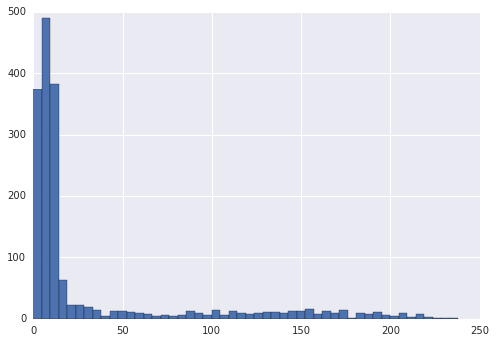

In [29]:
tmp = train_data['var3'].dropna()
tmp = tmp[tmp != 2]
plt.hist(tmp, bins=50);

In [34]:
74165/76020.0

0.9755985267034991